In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('client.csv', encoding='cp949')
df2 = pd.read_csv('campaign_etc.csv', encoding='cp949')
df = pd.merge(df1, df2, on='index', how='inner')
df.drop(['index', 'poutcome'], axis='columns', inplace=True)
df.insert(5, 'housing', '')
df.loc[:25131, 'housing'] = 'yes'
df.loc[25131:, 'housing'] = 'No'
df.rename(columns={'y':'deposit'},inplace=True)
df.replace({'yes': 1, 'yes': 1, 'No': 0, 'no':0},inplace=True)
df

,age,job,marital,education,default,housing,balance,loan,contact,day,month,duration,campaign,pdays,pdays_d,previous,deposit
0,58.0,management,married,tertiary,0,1,2143.0,0,unknown,5,may,261.0,1,-1,-1,0,0
1,34.0,technician,single,tertiary,0,1,2047.0,0,cellular,28,jul,57.0,5,-1,-1,0,0
2,39.0,management,single,tertiary,0,1,26.0,0,cellular,28,jul,110.0,18,-1,-1,0,0
3,40.0,management,married,tertiary,0,1,0.0,0,cellular,28,jul,52.0,11,-1,-1,0,0
4,37.0,technician,single,secondary,0,1,1127.0,0,cellular,20,apr,249.0,2,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,43.0,management,married,tertiary,0,0,1.0,0,cellular,22,aug,239.0,4,-1,-1,0,0
45207,58.0,retired,married,primary,0,0,701.0,0,cellular,22,aug,137.0,4,-1,-1,0,0
45208,52.0,technician,married,secondary,0,0,2944.0,0,cellular,22,aug,22.0,18,-1,-1,0,0
45209,46.0,entrepreneur,married,tertiary,0,0,1920.0,0,cellular,22,aug,604.0,6,-1,-1,0,1


# 결측치 존재하는 곳 위치 및 갯수 확인
* age column에 12개 결측치 존재  
: ```df['age'].describe()``` 이용해서 통계치 봤더니 평균값이 40 인데 min이 19, max가 95로 범위가 좀 넓은 편이긴 함. 그리고 뭔가 나이가 데이터 분석 시에 중요한 지표 중 하나로 활용될 가능성이 있어보여서 더 조심스럽기는 한데,,, 그래도 25%, 50%, 70%를 보면 33, 39, 48이라서 분산이 아주 큰 것 같지는 않음. 평균값은 40 이긴 한데, 이건 max값 95 같은게 영향을 주어서 더 올라갔을 가능성이 있어보임. 하나의 값으로 대체한다면 여기선 평균값보다는 중간값이 조금 더 분포를 잘 반영하지 않을까 하는 생각...!  

* balance column에 16개 결측치 존재  
: balance of the individual 값이라는데 사실 이게 뭔지 잘 모르겠음. 근데 값의 range가 너무 넓어서 이걸 평균값이든 중간값이든 뭔가 하나의 값으로 대체하는 것이 적합하지 않아보임... 이 큰 범주 안에서 어떤 값으로 대체해야 할지도 마땅하지 않고... 물론 갯수가 4만개 데이터 중 16개라서 큰 영향은 없겠지만, 어차피 큰 영향이 없을 것이라면 차라리 제거하는게 낫지 않을까...?  
  
* duration column에 123개 결측치 존재  
: duration의 경우 describe로 보았을 때에 min 0 max 4918로 범주가 매우 크게 나타나기는 하는데 25%, 50%, 75% 값을 보았을 때에는 103, 181, 319로 나타나서 이 값이 sec 단위 인것을 감안하면 분산이 아주 큰 편은 아닌 것으로 보임. 4918은 이상치인가 싶어서 boxplot을 그려봤더니 75% 기준 위로 1.5* IQR 을 벗어난 값들이 이상치 값으로 표현된 것인데 이게 range가 또 엄청 넓은 걸로 봐선, 아마 값별로는 수가 많지 않아보임. 즉, 하나씩 이상한 값들이 넓게 퍼진 느낌이라 이걸 대체값 선정하는 데에 고려할 필요는 없어 보임. 123개 결측치는 갯수가 적지 않고, 이상치 값들을 제외하고 나면 상대적으로 sec 단위 치고 분산이 크지 않음을 고려해서 중앙값 혹은 평균값으로 대체해주면 어떨까 함! 평균값은 확실히 이 넓은 range의 이상치들의 영향을 받아서 중간값에 비해 좀 높게 나온 것 같아서 중앙값이 나을 것 같기도 하고... 

In [2]:
df.isnull().sum()

age           12
job            0
marital        0
education      0
default        0
housing        0
balance       16
loan           0
contact        0
day            0
month          0
duration     123
campaign       0
pdays          0
pdays_d        0
previous       0
deposit        0
dtype: int64

In [3]:
df['duration'].describe()


count    45088.000000
mean       258.376309
std        257.846443
min          0.000000
25%        103.000000
50%        181.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [4]:
# age 결측치 (12개) 중앙값으로 채우기
age_median = df['age'].median(axis=0)  # age_median = 39
df['age'].fillna(age_median, inplace=True)
df.isnull().sum() # age 결측치 0개 된 것 확인 가능

# duration 결측치 (123개) 중앙값으로 채우기
duration_median = df['duration'].median(axis=0) # duration_median = 181
df['duration'].fillna(duration_median, inplace=True)
df.isnull().sum() # duration 결측치 0개 된 것 확인 가능

# balance 결측치 (16개) 제거 
## 남은 결측치가 balance 결측치뿐이라 전체에 대해 dropna 실행가능
df.dropna(inplace=True)
df.isnull().sum() # 모든 결측치 사라짐


age          0
job          0
marital      0
education    0
default      0
housing      0
balance      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
pdays_d      0
previous     0
deposit      0
dtype: int64

In [5]:
#plt.rcParams['figure.figsize'] = [10, 10]
#df.plot(kind='box', y='previous')

# 이상치 처리  
  
이상치에는 두가지가 존재. 한 가지는 아예 말이 안되는 잘못된 값이 있을 수 있고, 이는 제거하거나, 올바른 값으로 대체가 가능할 때는 수정 해주어야 할 값임. 두 번째는 불가능한 값은 아니기는 한데 분석에 영향을 미칠만큼 분포에서 벗어난 이상한 값. 이런 값을 실제 데이터가 이런 거라서 이걸 임의로 다른 값으로 변경하게 되면 결과에 오히려 영향을 줄 수 있다고 봄. 분석에 방해가 될 정도로 이상한 값이라면 제거하는 것이 좋다고 생각.  

column 각각에 대하여 오류값, 이상값을 구분하여 살펴보고 각각에 기준 적용하여 이상치 처리함.
 
1. age: 최솟값, 최댓값이 모두 충분히 가능한 값으로 오류값은 존재하지 않음. 이상값으로 분석에 악영향을 줄만큼 분포에서 벗어난 값은 없다고 판단. 워낙 값의 범위가 크지 않아 특별히 제외시켜야 할 값 없다고 판단하여 이상치 처리 별도로 하지 않음.

2. balance: 잔고를 의미하므로 음수는 오류값으로 생각하고 제거. 그 후에 IQR 기준으로 자르려고 했으나 보편적인 기준인 25%-1.5IQR 이하, 75%+1.5IQR 이상 으로 적용하기에는 outlier 로 잡히는 값이 지나치게 많고 범주도 너무 넓음. 그리고 boxplot 상으로 보았을 때 이 outlier 들이 꽤나 촘촘하게 분포하고 있어 이를 모두 제거하는 것은 적합하지 않다고 판단. boxplot 상에서 시각적으로 판단해서 50000이상의 값을 제거하기로 결정. 

3. day: 이전달 마지막 contact한 날짜라서 1-31 범주 벗어나면 잘못된 값이므로 제거필요. 하지만 코드 실행시켜서 확인한 결과 모두 1-31 범주 내에 들어와서 제거할 데이터 없었음.

4. duration : contact 이어진 시간을 sec 단위로 표시한 데이터인데 sec 단위라서 범주가 매우매우 넓음. 25%-1.5IQR 이하, 75%+1.5IQR 이상을 outlier 로 설정하여 제거

5. campaign: contact 횟수 의미하며, 오류값으로 보이는 값 없음. 값의 분포가 age 처럼 넓지 않은 편이라 특별히 이상치로 처리할 데이터 없다고 판단. 별도의 이상치 처리 하지 않음. 

6. pdays: 이전 contact으로부터 지난 날을 의미하는 값으로 음수값을 띨 수 없으므로 음수값은 오류값으로 생각하고 제거. 나머지 값들의 분포를 보았을 때에는, IQR 로 자르기에는 꽤 많은 수가 제거되는데 그렇게 값의 범주가 크지도 않고 분석에 큰 영향을 주지 않을 것 같다고 판단하여 이보다 적은 숫자만을 제거하고자 boxplot 상에서 시각적으로 기준점을 설정함. 700 이상에 해당하는 값을 제거하기로 결정.  

7. previous : 이전 contact 횟수를 의미하여 불가능한 값이랄 건 없지만, boxplot 상으로 보았을 때 한 개의 데이터가 혼자 300에 가까운 값을 보여 분석에 방해가 될 것이라 판단하여 제거. 나머지 데이터 중에서는 boxplot 상에서 분포가 조금 띄엄띄엄 있는 것으로 나타나는 30 이상의 data를 제거.

In [6]:
# age 는 자를 것 없음. 그대로 유지 (범위 자체가 크지 않고 최댓값이 95세로 오류값이라고 보기 어려우므로)


# balance 이상치 처리
# 음수값 제거
balance_negative = df['balance'] < 0
df.drop(df.loc[balance_negative].index, axis='index', inplace=True)

# IQR 기준 이상치 제거 -> 너무 많이 잘려나가서 기각
#q1, q3 = df['balance'].quantile(0.25), df['balance'].quantile(0.75)
#iqr = q3-q1
#condition = (df['balance'] > q1-1.5*iqr) & (df['balance'] < q3+1.5 *iqr)
#df['balance'][condition].describe()

# 50000 이상인 값 제거 : boxplot 상으로 시각적으로 판단
balance_outlier = df['balance'] > 50000
df.drop(df.loc[balance_outlier].index, axis='index', inplace=True)


# day 이상치 처리
day_outlier = (df['day']<0) | (df['day']>31)
df.drop(df.loc[day_outlier].index, axis='index', inplace=True)


#campaign 는 유지 (25%-1.5IQR, 75%+1.5IQR 기준으로 outlier 확인 했을 때에 3234개가 outlier로 잡히고, 41949개가 남음.상대적으로 outlier 비율 적다고 생각하여 유지)


#duration 이상치 처리
# IQR 기준 이상치 제거
duration_q1, duration_q3 = df['duration'].quantile(0.25), df['duration'].quantile(0.75)
duration_iqr = duration_q3-duration_q1
condition = (df['duration'] > duration_q1-1.5*duration_iqr) & (df['duration'] < duration_q3+1.5 *duration_iqr)
df['duration'][condition].describe()


# pdays 이상치 처리
# 음수값 제거
pdays_negative = df['pdays'] <0
df.drop(df.loc[pdays_negative].index, axis='index', inplace=True)
# 700 이상 제거 : boxplot 상에서 시각적으로 판단
pdays_outlier = df['pdays'] > 700
df.drop(df.loc[pdays_outlier].index, axis='index', inplace=True)


# previous 이상치 처리
# 혼자 동떨어져있는 250 이상 값 제거하기 : 혼자 너무 동떨어져있는데 boxplot 상에서 확인되어서 먼저 제거
previous_outlier = df['previous'] > 250
df.drop(df.loc[previous_outlier].index, axis='index', inplace=True)

# 30 이상 제거: boxplot 상으로 시각적으로 판단
previous_outlier2 = df['previous'] > 30
df.drop(df.loc[previous_outlier2].index, axis='index', inplace=True)

df.describe()

,age,default,housing,balance,loan,day,duration,campaign,pdays,pdays_d,previous,deposit
count,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.000000,7718.00000
mean,41.043794,0.002850,0.607930,1649.260301,0.125551,14.335579,261.246437,2.044960,218.666235,218.666235,3.090568,0.23944
std,11.551706,0.053317,0.488244,2791.903196,0.331364,7.957976,235.842310,1.546958,109.771390,109.771390,3.108793,0.42677
min,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,33.000000,0.000000,0.000000,230.000000,0.000000,7.000000,113.000000,1.000000,126.000000,126.000000,1.000000,0.00000
50%,38.000000,0.000000,1.000000,680.000000,0.000000,14.000000,195.000000,2.000000,189.000000,189.000000,2.000000,0.00000
75%,48.000000,0.000000,1.000000,1856.500000,0.000000,20.000000,324.000000,2.000000,321.000000,321.000000,4.000000,0.00000
max,93.000000,1.000000,1.000000,37378.000000,1.000000,31.000000,2219.000000,16.000000,690.000000,690.000000,30.000000,1.00000


# 중복되는 column 제거 (유일성)

겹치는 row가 있을 경우에는 ```df.drop_duplicates(inplace=True)```로 가능할 텐데 이렇게 했을 때 겹치는 값 없었고, 겹치는 column 살펴 보기 위하여 ```df.T.duplicated()```로 확인했더니 'pdays_d' column이 'pdays'와 중복인 것을 확인하여 이를 제거하기로 함.

In [7]:
df.T.duplicated()

age          False
job          False
marital      False
education    False
default      False
housing      False
balance      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
pdays_d       True
previous     False
deposit      False
dtype: bool

In [8]:
df = df.T.drop_duplicates().T
df

,age,job,marital,education,default,housing,balance,loan,contact,day,month,duration,campaign,pdays,previous,deposit
5,43,management,married,tertiary,0,1,1336,1,cellular,27,may,82,2,309,1,0
6,54,blue-collar,divorced,primary,0,1,10374,0,cellular,20,nov,283,2,189,2,0
7,31,blue-collar,married,secondary,0,1,631,0,cellular,20,apr,211,2,152,2,0
21,47,unemployed,married,secondary,0,1,3533,0,cellular,20,nov,319,1,100,2,0
31,32,blue-collar,married,secondary,0,1,10287,0,cellular,27,may,281,4,188,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41669,33,management,married,tertiary,0,0,1071,0,cellular,2,feb,84,2,174,4,0
41673,31,unemployed,single,primary,0,0,163,0,cellular,30,jan,707,2,2,1,1
41674,28,management,single,tertiary,0,0,2080,0,telephone,30,jan,399,2,2,1,0
41676,49,management,married,tertiary,0,0,15,0,cellular,30,jan,166,3,2,2,0


In [9]:
# 최종적으로 7718개의 데이터가 남았음. 이를 가지고 분석 진행하기로 함.

In [10]:
df = df.astype({'age':float})
df['job'].value_counts()

management       1728
blue-collar      1450
technician       1256
admin.           1014
services          645
retired           474
student           283
self-employed     266
entrepreneur      218
unemployed        201
housemaid         150
unknown            33
Name: job, dtype: int64

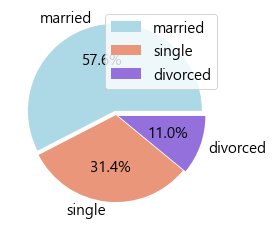

In [11]:
# marital 분석
marital = df['marital'].value_counts()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.size'] = 15
plt.pie(marital, labels=['married', 'single', 'divorced'], colors=['lightblue', 'darksalmon', 'mediumpurple']
        , autopct='%.1f%%', explode=(0.05, 0, 0.03))
plt.legend()
plt.show()

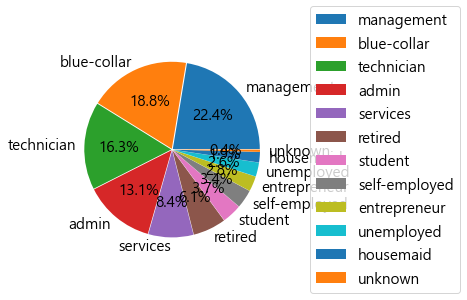

In [12]:
# job 분석
job = df['job'].value_counts()
plt.rcParams['font.size'] = 15
plt.pie(job, labels=['management', 'blue-collar', 'technician', 'admin', 'services', 'retired', 'student', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'unknown']
        , autopct='%.1f%%', explode=(0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

Text(0.5, 1.0, '고객층의 age 분포')

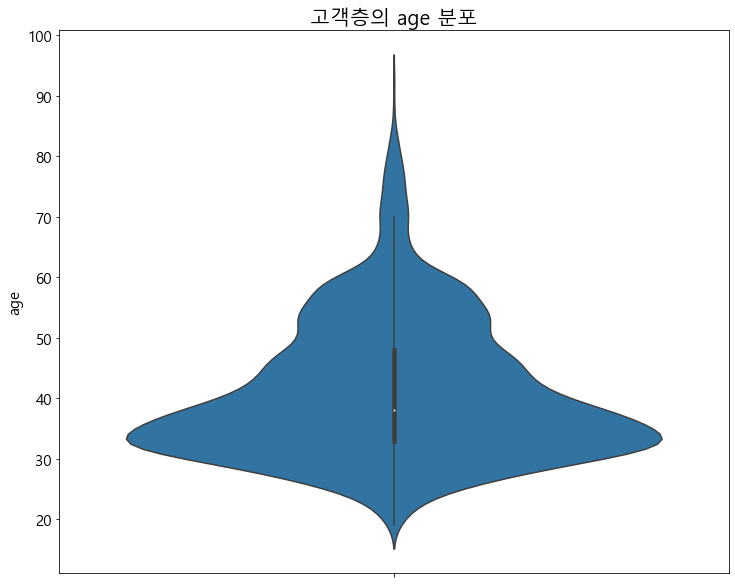

In [13]:
# age 분석_violinplot
df = df.astype({'age':float})
age = plt.subplots(figsize=(12, 10))
age = sns.violinplot(data=df, y='age')
age.set_title("고객층의 age 분포", size=20)

(126.0, 189.0, 321.0, 218.66623477584866)

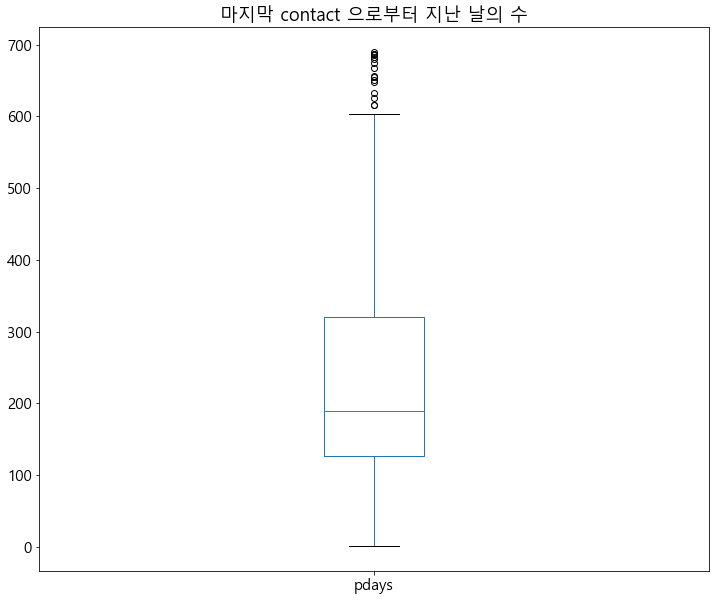

In [15]:
# pdays 분석 
pdays = plt.subplots(figsize=(12, 10))
pdays = df['pdays'].plot(kind='box')
pdays.set_title("마지막 contact 으로부터 지난 날의 수")
df['pdays'].quantile(0.25), df['pdays'].quantile(0.5), df['pdays'].quantile(0.75), df['pdays'].mean()

Text(0.5, 1.0, '고객층의 age 분포')

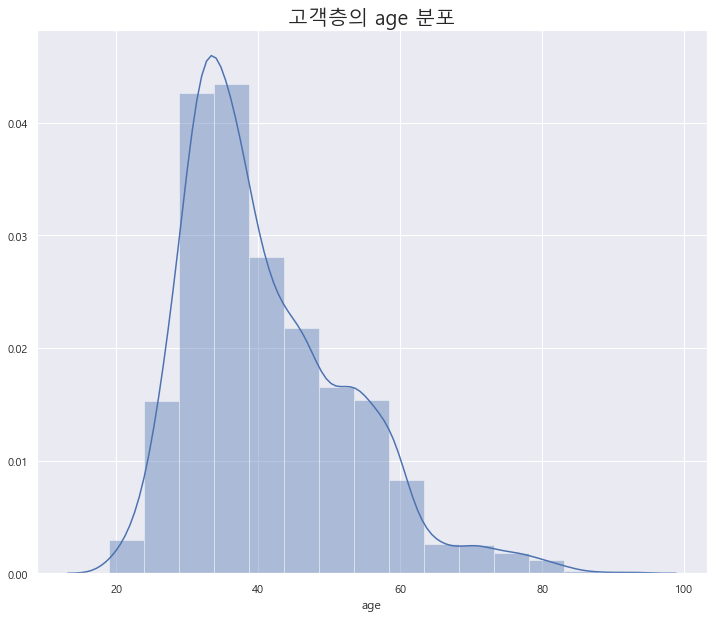

In [24]:
age1 = plt.subplots(figsize=(12, 10))
plt.rcParams['font.family'] = 'Malgun Gothic'
age1 = sns.distplot(df['age'], bins=15)
age1.set_title("고객층의 age 분포", size=20)

Text(0.5, 1.0, 'duration 분포')

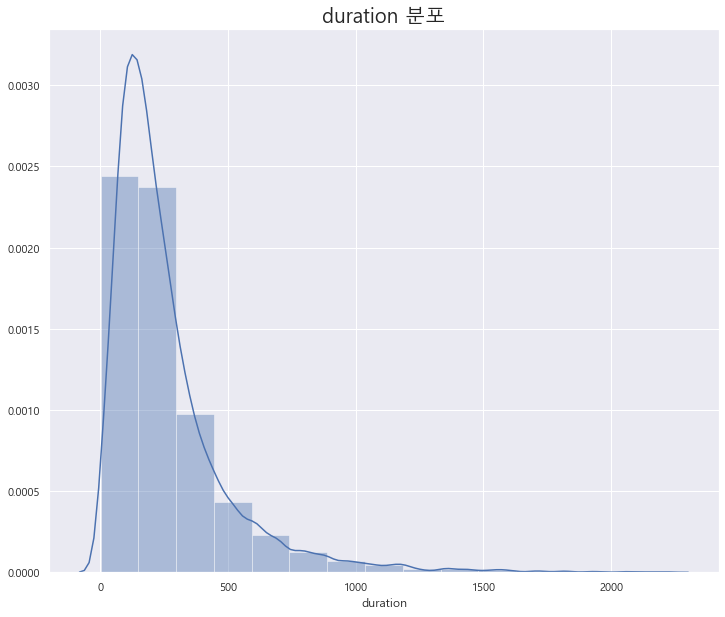

In [64]:
duration1 = plt.subplots(figsize=(12, 10))
plt.rcParams['font.family'] = 'Malgun Gothic'
duration = sns.distplot(df['duration'], bins=15)
duration.set_title("duration 분포", size=20)

<AxesSubplot:title={'center':"customer's age and duration"}, xlabel='age', ylabel='duration'>

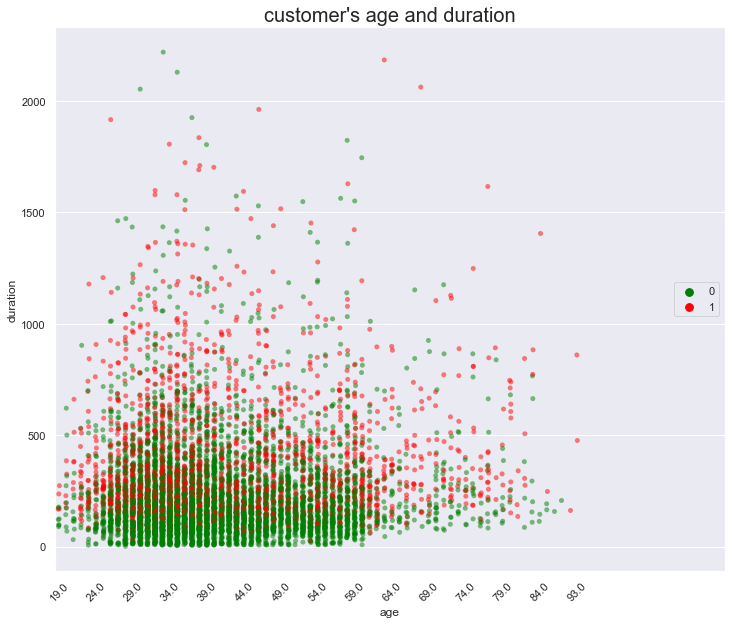

In [19]:
import numpy as np

sns.set(rc = {'figure.figsize':(12,10)})
age_duration = sns.stripplot(x='age', y='duration', hue="deposit", palette=["green", "red"], data=df, alpha=0.5)
plt.title("customer's age and duration", size=20)
plt.xticks(rotation=45)
plt.xticks(np.arange(0, 95, 5))
plt.yticks(np.arange(0, 2500, 500))
plt.legend(loc='center right')
age_duration


No handles with labels found to put in legend.


<AxesSubplot:title={'center':"Yes deposit customer's age and duration"}, xlabel='age', ylabel='duration'>

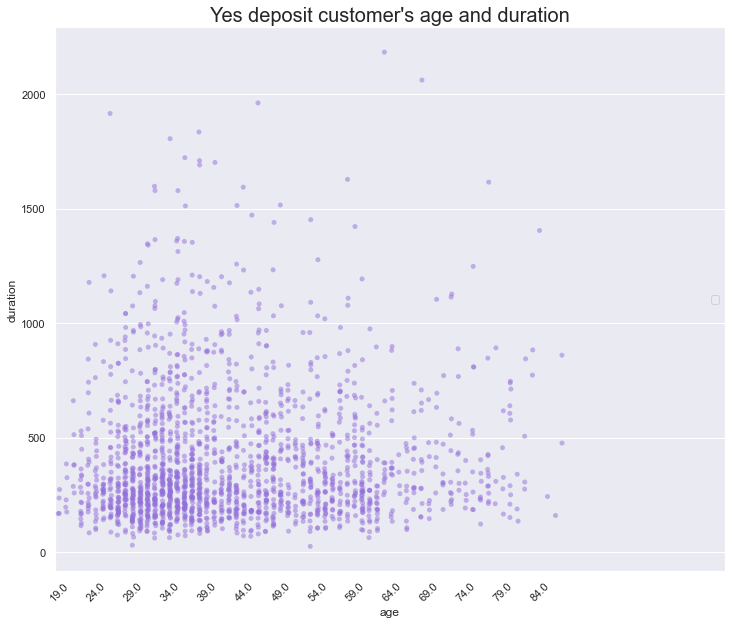

In [72]:
import numpy as np

sns.set(rc = {'figure.figsize':(12,10)})
age_duration = sns.stripplot(x='age', y='duration',palette=["mediumpurple"], data=df.loc[df['deposit']==1], alpha=0.5)
plt.title("Yes deposit customer's age and duration", size=20)
plt.xticks(rotation=45)
plt.xticks(np.arange(0, 95, 5))
plt.yticks(np.arange(0, 2500, 500))
plt.legend(loc='center right')
age_duration


<AxesSubplot:title={'center':"customer's balance and duration"}, xlabel='balance', ylabel='duration'>

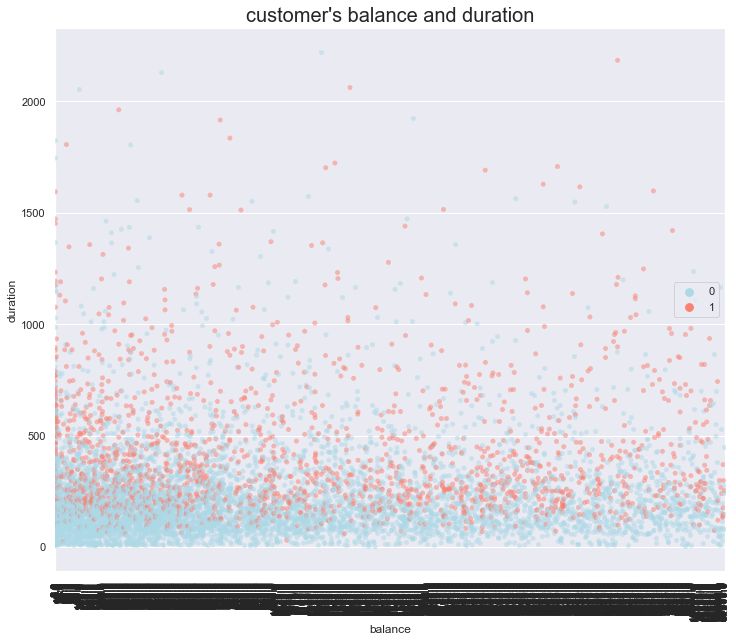

In [54]:
import numpy as np

sns.set(rc = {'figure.figsize':(12,10)})
balance_duration = sns.stripplot(x='balance', y='duration', hue="deposit", palette=["lightblue", "salmon"], data=df, alpha=0.5)
plt.title("customer's balance and duration", size=20)
plt.xticks(rotation=90)
#balance_duration.set_xticks(range(0,40000, 5000))
plt.legend(loc='center right')
balance_duration

In [47]:
deposit_true = df['deposit'] == 1
deposit_false = df['deposit'] == 0
true = df.loc[deposit_true]
true_job_groups = true.groupby("job")
true_series = true_job_groups['deposit'].count()  # 모든 column에서 데이터 수는 동일하기는 한데 굳이 dataframe으로 같은 값 여러개 띄울 필요 없어서 한 column 지정해서 호출한 것
false = df.loc[deposit_false]
false_job_groups = false.groupby("job")
false_series = false_job_groups['deposit'].count()

df_concat = pd.concat([true_series, false_series], axis=1)
df_concat.columns = ['true', 'false']
df_concat['ratio'] = df_concat['true']/(df_concat['true']+df_concat['false'])
df_concat

,true,false,ratio
job,,,
admin.,239,775,0.235700
blue-collar,168,1282,0.115862
entrepreneur,27,191,0.123853
housemaid,33,117,0.220000
management,513,1215,0.296875
retired,202,272,0.426160
self-employed,63,203,0.236842
services,113,532,0.175194
student,119,164,0.420495


Text(0.5, 1.0, '직업군에 따른 적금 개설 성사 비율')

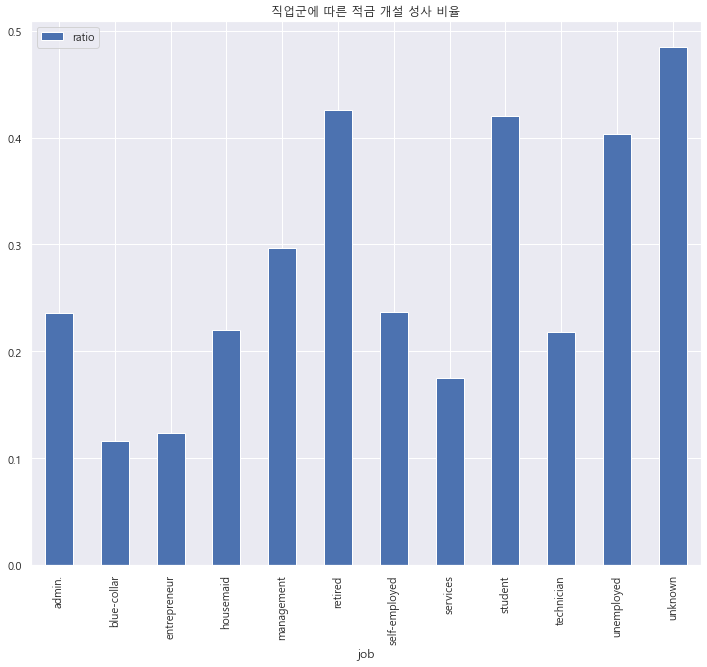

In [50]:
plt.rcParams['font.family'] = 'Malgun Gothic'
job_concat = df_concat.plot(kind='bar', y='ratio')
job_concat.set_title("직업군에 따른 적금 개설 성사 비율")

<AxesSubplot:>

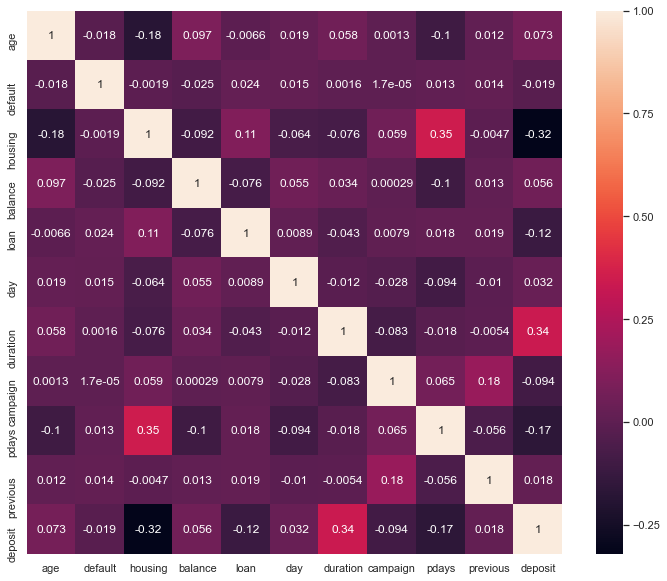

In [56]:
df= df.astype({'default':'int','loan':'int','day':'int','campaign':'int','pdays':'int','previous':'int','deposit':'int','housing':'int', 'age':'float', 'balance':'float','duration':'float'})
sns.heatmap(df.corr(), annot=True)

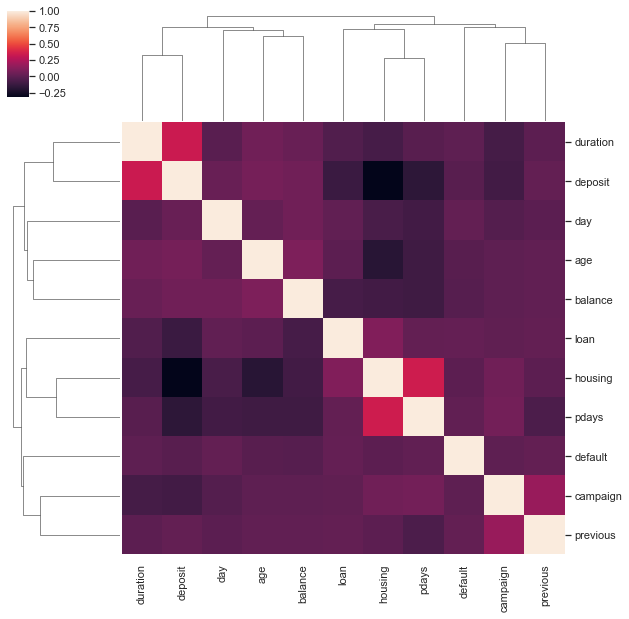

In [57]:
corr = df.corr()
sns.clustermap(corr)

Text(0.5, 1.0, '결혼 상태에 따른 적금 개설 성사 비율')

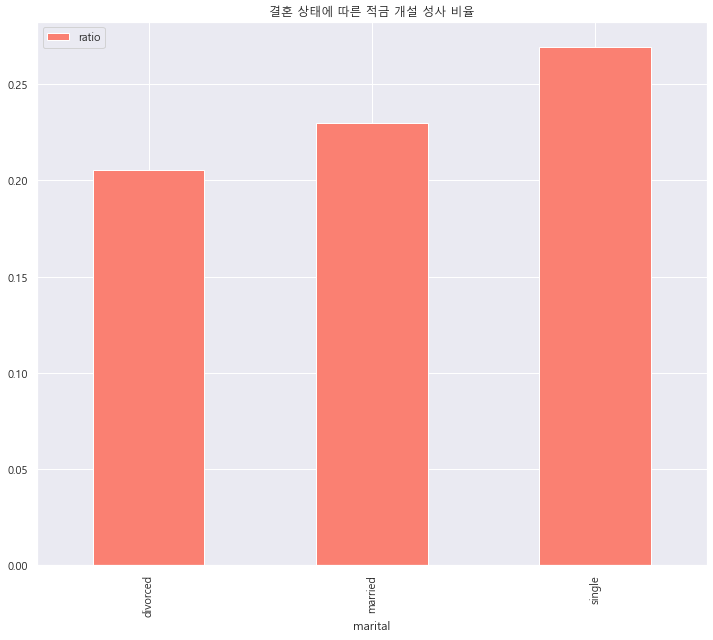

In [58]:
deposit_true = df['deposit'] == 1
deposit_false = df['deposit'] == 0
true = df.loc[deposit_true]
true_marital_groups = true.groupby("marital")
true_series1 = true_marital_groups['deposit'].count()  # 모든 column에서 데이터 수는 동일하기는 한데 굳이 dataframe으로 같은 값 여러개 띄울 필요 없어서 한 column 지정해서 호출한 것
false = df.loc[deposit_false]
false_marital_groups = false.groupby("marital")
false_series1 = false_marital_groups['deposit'].count()

df_concat = pd.concat([true_series1, false_series1], axis=1)
df_concat.columns = ['true', 'false']
df_concat['ratio'] = df_concat['true']/(df_concat['true']+df_concat['false'])

plt.rcParams['font.family'] = 'Malgun Gothic'
marital_concat = df_concat.plot(kind='bar', y='ratio', color='salmon')
marital_concat.set_title("결혼 상태에 따른 적금 개설 성사 비율")

In [62]:
df= df.astype({'default':'int','loan':'int','day':'int','campaign':'int','pdays':'int','previous':'int','deposit':'int','housing':'int', 'age':'float', 'balance':'float','duration':'float'})
df.corr()['deposit'].sort_values(ascending=False)

deposit     1.000000
duration    0.338168
age         0.073075
balance     0.055593
day         0.031663
previous    0.018424
default    -0.018609
campaign   -0.094428
loan       -0.119139
pdays      -0.165732
housing    -0.321805
Name: deposit, dtype: float64